Consider the SIR-modified model. Here we provide some simulations to estimate the number of susceptible individuals at the beginning of each dengue fever outbreak.

Key time-dependent parameters:

$$
\alpha(t) = \rho_0 + \sum\limits_{i=1}^n \rho_i\left(\frac{1+\tanh{\left(t-\left(T_i-\frac{\iota}{2}\right)\right)}}{2}\right)\left(\frac{1-\tanh{\left(t-\left(T_i+\frac{\iota}{2}\right)\right)}}{2}\right), \quad t \geq 0.
$$

$$
\beta(t) = A_0 + \sum\limits_{i=1}^{n} A_i \exp{\left[-\frac{1}{2}\left(\frac{t-\tau_i}{\sigma_i + sk_i(t-\tau_i)}\right)^2\right]}, \quad t \geq 0.
$$

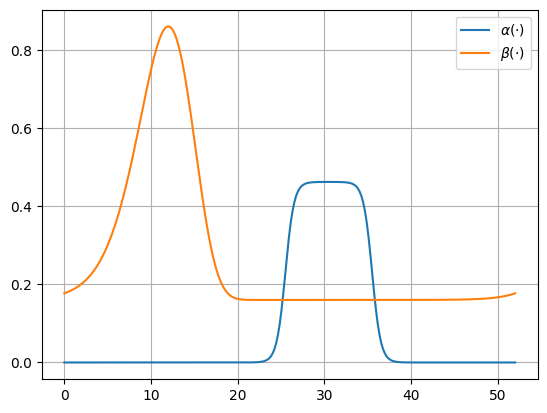

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, quad
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# parameters values - the constraint intervals in which they belong are indicated in the commentaries
rho_0 = 0.0
B_0 = 0.16
rho = np.array([0.462, 0.462, 0.462, 0.462, 0.462])
# rho[i] in [0.0,1.0]
T = np.array([30.5, 82.5, 134.5, 186.5, 238.5])
# T[0] in [42.0,62.0]
B = np.array([0.7,0.7,0.7, 0.7, 0.7])
# B[i] in [0.1,1.0]
tau = np.array([12, 64, 116, 168, 221])
# center points of the gaussian: tau1 in [10.0,26.0], tau2 in [62.0,78.0],...
sigma = np.array([3.2, 3.2, 3.2, 3.2, 3.2])
# sigma in [1.0,5.0]
sk = np.array([-0.10, -0.10, -0.10, -0.10, -0.10])
# sk in [-0.25,0.25]
gamma = 0.15
# gamma in [0.05,0.15]
iota=10

# Define the time-dependent parameters
def alpha(t, rho_0, rho, T, iota):
  result = np.zeros_like(t, dtype=float)
  for i in range(len(rho)):
    result += rho[i] * ((1 + np.tanh(t - (T[i] - iota/2)))/2) * ((1 - np.tanh(t - (T[i] + iota/2)))/2)
  return rho_0 + result

def beta(t, B_0, B, tau, sigma):
  result = np.zeros_like(t, dtype=float)
  for i in range(len(B)):
    result += B[i] * np.exp(-0.5 * ((t - tau[i]) / (sigma[i] + sk[i] * (t - tau[i])))**2)
  return B_0 + result

def Rt(t, gamma, B_0, B, tau, sigma):
  return beta(t, B_0, B, tau, sigma) / gamma

t = np.linspace(0, 52, 250)

plt.figure()
plt.plot(t, alpha(t, rho_0, rho, T, iota))
plt.plot(t, beta(t, B_0, B, tau, sigma))
label = [r'$\alpha(\cdot)$', r'$\beta(\cdot)$']
plt.legend(label)
plt.grid()
plt.show()

In [ ]:
# Find the indices corresponding to the interval [25, 50]
start_index = np.abs(t - 25).argmin()
end_index = np.abs(t - 50).argmin()

# Perform the trapezoidal integration over the specified interval
integral_result = np.trapezoid(alpha(t, rho_0, rho, T, iota)[start_index:end_index+1], t[start_index:end_index+1])

# You can then print or use the integral_result
print(integral_result)

4.539119366750339


In [ ]:
# from scipy.interpolate import interp1d
# beta_t_interp = interp1d(t, beta_t, kind='linear', bounds_error=False, fill_value=(beta_t[0], beta_t[-1]))
# alpha_t_interp = interp1d(t, alpha_t, kind='linear', bounds_error=False, fill_value=(alpha_t[0], alpha_t[-1]))
# alpha = lambda t: alpha_t(t, rho_0, rho, T, iota)
# beta = lambda t: beta_t(t, B_0, B, tau, sigma)

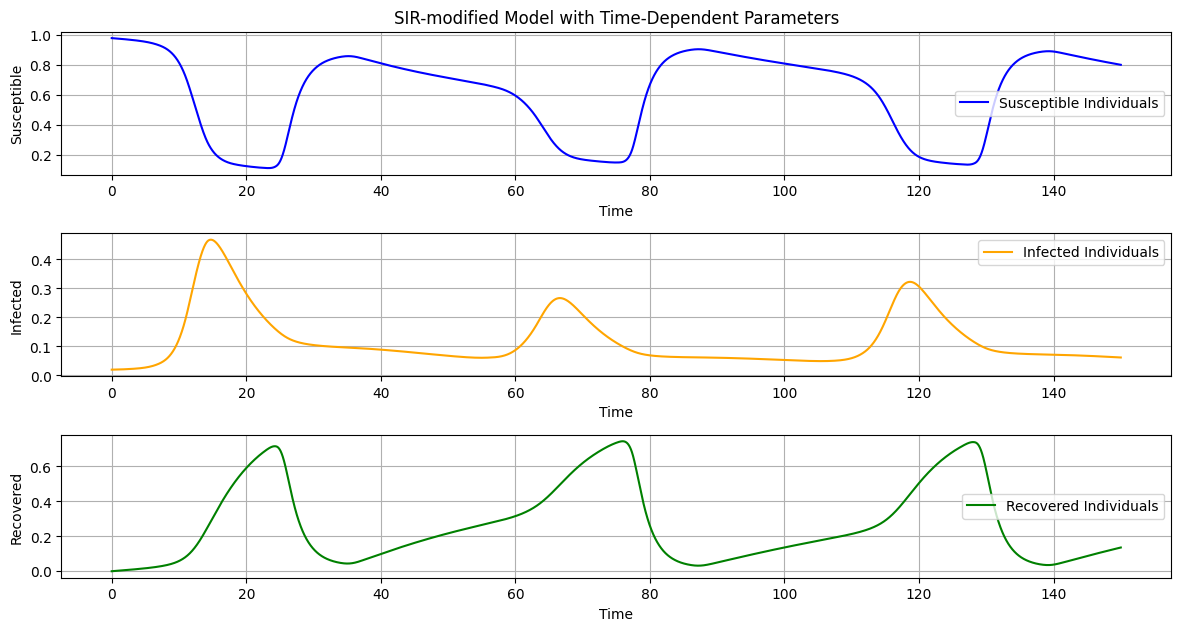

In [ ]:
# Define the system of ODEs
def sir_modified(t, N):
    S, I, R = N
    betat = beta(t, B_0, B, tau, sigma)
    alphat = alpha(t, rho_0, rho, T, iota)

    dSdt = -betat*I*S + alphat*R
    dIdt = betat*I*S - gamma*I
    dRdt = gamma*I - alphat*R

    return [dSdt, dIdt, dRdt]

# Initial conditions
S0 = 0.98                # Initial susceptible population - S0 in [0.75,0.999]
I0 = 0.02                # Initial infected population
R0 = 0.00                # Initial recovered population
N0 = [S0, I0, R0]

# Time span
t_span = (0, 150)                     # From t=0 to t=400
t_eval = np.linspace(*t_span, 10000)   # Points where solution is computed

# Solve the IVP
solution = solve_ivp(sir_modified, t_span, N0, t_eval=t_eval, method='RK45')

# Extract results
t = solution.t
S, I, R = solution.y

# Plot the results
plt.figure(figsize=(12, 8))

# Susceptible individuals plot
plt.subplot(4, 1, 1)
plt.plot(t, S, label="Susceptible Individuals", color="blue")
plt.title("SIR-modified Model with Time-Dependent Parameters")
plt.xlabel("Time")
plt.ylabel("Susceptible")
plt.legend()
plt.grid()

# Infected individuals plot
plt.subplot(4, 1, 2)
plt.plot(t, I, label="Infected Individuals", color="orange")
plt.xlabel("Time")
plt.ylabel("Infected")
plt.legend()
plt.grid()

# Recovered individuals plot
plt.subplot(4, 1, 3)
plt.plot(t, R, label="Recovered Individuals", color="green")
plt.xlabel("Time")
plt.ylabel("Recovered")
plt.legend()
plt.grid()

# #Rt
# plt.subplot(4, 1, 4)
# plt.plot(t, Rt(t, gamma, B_0, B, tau, sigma)*S , label=r"$R_t$", color="red")
# plt.xlabel("Time")
# plt.ylabel("$R_t$")
# plt.legend()
# plt.grid()

plt.tight_layout()
plt.show()

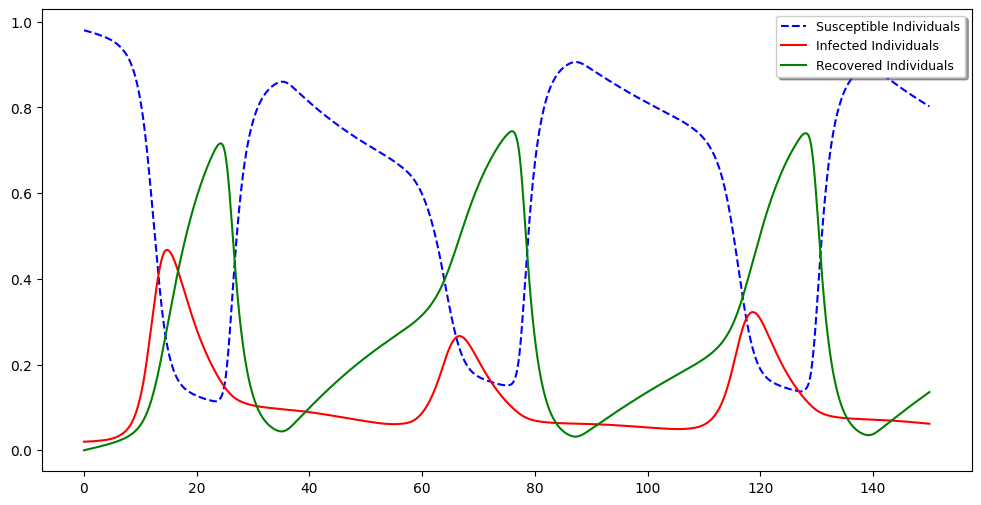

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(t, S, label="Susceptible Individuals", color="blue",linewidth=1.5,linestyle='--')
plt.plot(t, I, label="Infected Individuals", color="red",linewidth=1.5,linestyle='-')
plt.plot(t, R, label="Recovered Individuals", color="green",linewidth=1.5)
plt.legend(loc='upper right', fontsize=9, frameon=True, shadow=True)
plt.show()


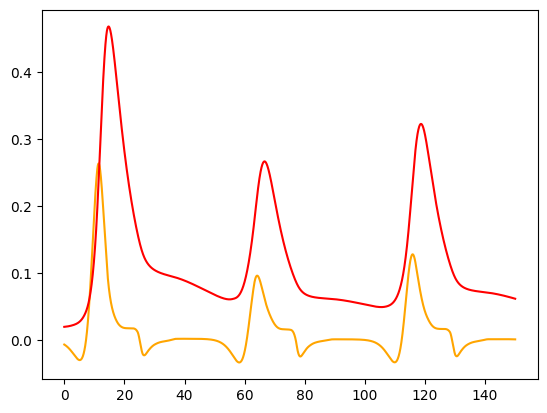

In [ ]:
def A(t, S, gamma, B_0, B, tau, sigma):
    beta_vals = beta(t, B_0, B, tau, sigma)  # vectorized
    product = beta_vals * S
    term1 = (product - gamma)**2
    # derivative of product w.r.t. t
    term2 = np.gradient(product, t)  # discrete derivative
    return term1 - term2

plt.plot(t, A(t, S, gamma, B_0, B, tau, sigma), color = 'orange')
# plt.plot(t,beta(t,B_0,B,tau,sigma), color= 'blue')
# plt.plot(t,gamma/S, color = 'green')
plt.plot(t,I, color = 'red')

0.16000014963972972 0.8599999541077188


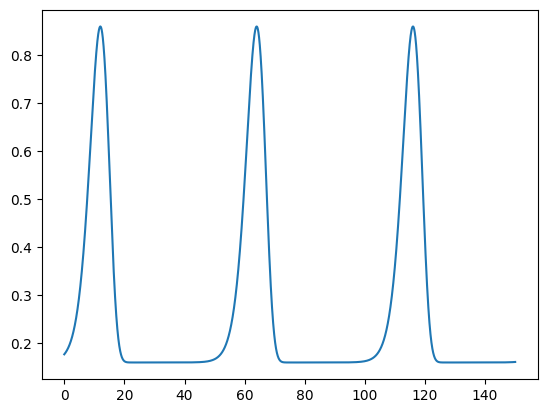

In [ ]:
plt.plot(t,beta(t, B_0, B, tau, sigma))
L = min(beta(t, B_0, B, tau, sigma))
U = max(beta(t, B_0, B, tau, sigma))
print(L,U)

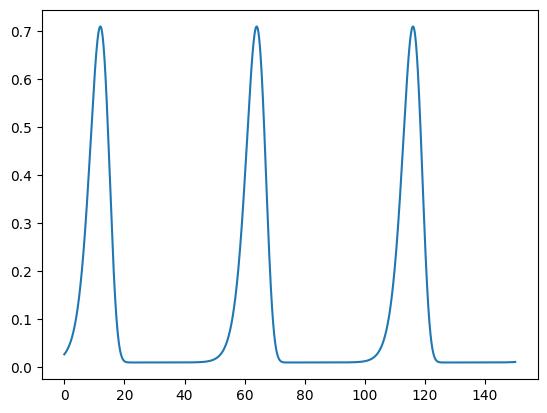

In [ ]:
plt.plot(t,beta(t, B_0, B, tau, sigma)-gamma)

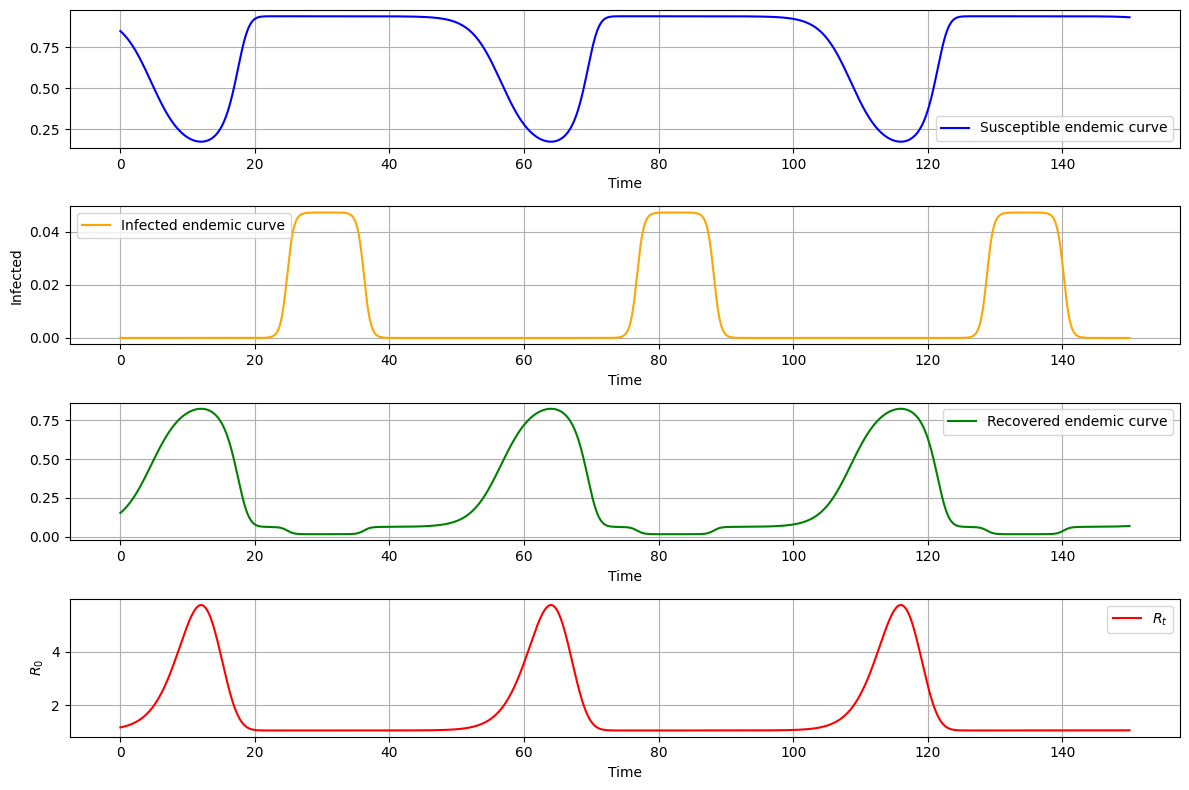

In [ ]:
Seq = gamma/beta(t, B_0, B, tau, sigma)
Ieq = (alpha(t, rho_0, rho, T, iota)*(beta(t, B_0, B, tau, sigma)-gamma))/(beta(t, B_0, B, tau, sigma)*(alpha(t, rho_0, rho, T, iota)+gamma))
Req = (gamma*(beta(t, B_0, B, tau, sigma)-gamma))/(beta(t, B_0, B, tau, sigma)*(alpha(t, rho_0, rho, T, iota)+gamma))

plt.figure(figsize=(12, 8))

# Susceptible individuals plot
plt.subplot(4, 1, 1)
plt.plot(t, Seq,label="Susceptible endemic curve", color="blue")
plt.xlabel("Time")
plt.legend()
plt.grid()

# Infected individuals plot
plt.subplot(4, 1, 2)
plt.plot(t, Ieq, label="Infected endemic curve", color="orange")
plt.xlabel("Time")
plt.ylabel("Infected")
plt.legend()
plt.grid()

# Recovered individuals plot
plt.subplot(4, 1, 3)
plt.plot(t, Req, label="Recovered endemic curve", color="green")
plt.xlabel("Time")
plt.legend()
plt.grid()

#Rt
plt.subplot(4, 1, 4)
plt.plot(t, Rt(t, gamma, B_0, B, tau, sigma) , label=r"$R_t$", color="red")
plt.xlabel("Time")
plt.ylabel("$R_0$")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
print(gamma/beta(0, B_0, B, tau, sigma))
print((alpha(0, rho_0, rho, T, iota)*(beta(0, B_0, B, tau, sigma)-gamma))/(beta(0, B_0, B, tau, sigma)*(alpha(0, rho_0, rho, T, iota)+gamma)))
print((gamma*(beta(0, B_0, B, tau, sigma)-gamma))/(beta(0, B_0, B, tau, sigma)*(alpha(0, rho_0, rho, T, iota)+gamma)))

0.8475504766354399
0.0
0.1524495233645601


In [ ]:
I[10]


np.float64(0.020072045990462212)

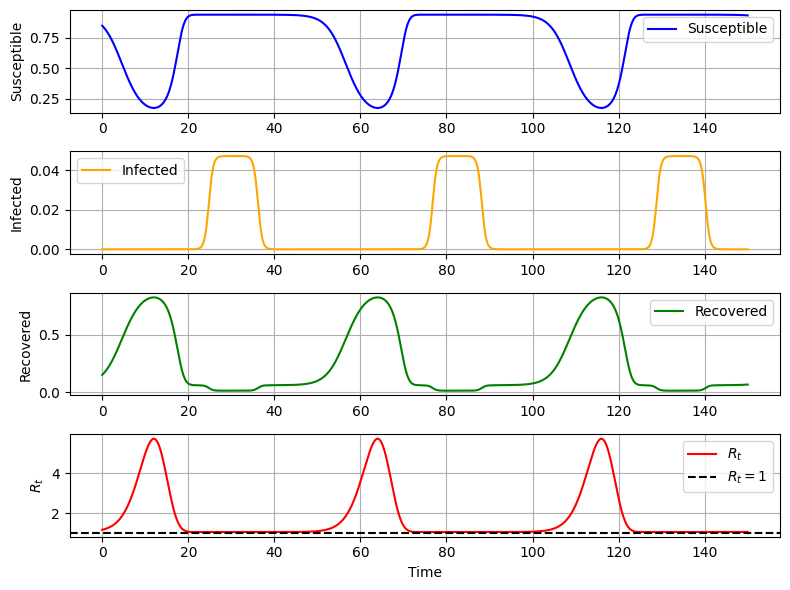

Initial conditions: S0=0.98, I0=0.02, R0=0.0
Final values: S=0.9313, I=0.0000, R=0.0687
Maximum infection rate: 4.72%
Time of maximum infection: 83.1


In [ ]:
# Calculate Rt values
Rt_values = Rt(t, gamma, B_0, B, tau, sigma)

# Initialize arrays for the equilibrium values
Seq = np.zeros_like(t)
Ieq = np.zeros_like(t)
Req = np.zeros_like(t)

# Initialize with initial conditions
Seq[0] = S0
Ieq[0] = I0
Req[0] = R0

# Calculate values based on Rt condition
for i, time in enumerate(t):
    if Rt_values[i] > 1:
        beta_val = beta(time, B_0, B, tau, sigma)
        alpha_val = alpha(time, rho_0, rho, T, iota)

        Seq[i] = gamma / beta_val
        Ieq[i] = (alpha_val * (beta_val - gamma)) / (beta_val * (alpha_val + gamma))
        Req[i] = (gamma * (beta_val - gamma)) / (beta_val * (alpha_val + gamma))
    else:
        # When Rt <= 1, set to disease-free equilibrium
        Seq[i] = 1
        Ieq[i] = 0
        Req[i] = 0

# Create the plot
plt.figure(figsize=(8, 6))

# Susceptible individuals plot
plt.subplot(4, 1, 1)
plt.plot(t, Seq, label="Susceptible", color="blue")
plt.ylabel("Susceptible")
plt.legend()
plt.grid()

# Infected individuals plot
plt.subplot(4, 1, 2)
plt.plot(t, Ieq, label="Infected", color="orange")
plt.ylabel("Infected")
plt.legend()
plt.grid()

# Recovered individuals plot
plt.subplot(4, 1, 3)
plt.plot(t, Req, label="Recovered", color="green")
plt.ylabel("Recovered")
plt.legend()
plt.grid()

# Rt plot
plt.subplot(4, 1, 4)
plt.plot(t, Rt_values, label=r"$R_t$", color="red")
plt.axhline(y=1, color='black', linestyle='--', label=r"$R_t = 1$")
plt.xlabel("Time")
plt.ylabel("$R_t$")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Print summary information
print(f"Initial conditions: S0={S0}, I0={I0}, R0={R0}")
print(f"Final values: S={Seq[-1]:.4f}, I={Ieq[-1]:.4f}, R={Req[-1]:.4f}")
print(f"Maximum infection rate: {max(Ieq)*100:.2f}%")
print(f"Time of maximum infection: {t[np.argmax(Ieq)]:.1f}")

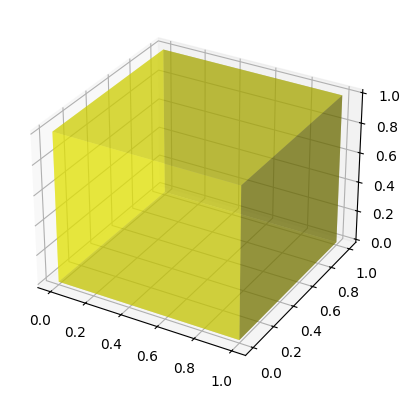

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.bar3d([0], [0], [0], [1], [1], [1], color='yellow', alpha=0.5)  # Simple slab
plt.show()

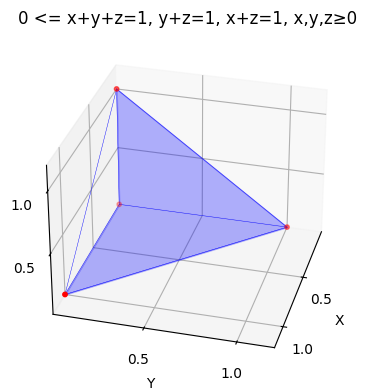

In [ ]:
# Create figure
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')

# Define vertices of the simplex slab
vertices = np.array([
    [0, 0, 0],  # x=y=z=0
    [1, 0, 0],  # x+y=1, z=0
    [0, 1, 0],  # y+z=1, x=0
    [0, 0, 1],  # x+z=1, y=0
])

# Plot the triangular faces
ax.add_collection3d(Poly3DCollection([vertices], alpha=0.3, color='blue'))

# Plot the edges
edges = [
    [vertices[0], vertices[1]],
    [vertices[1], vertices[2]],
    [vertices[2], vertices[3]],
    [vertices[3], vertices[0]],
    [vertices[0], vertices[2]],
    [vertices[1], vertices[3]],
]
for edge in edges:
    ax.plot3D(*zip(*edge), color='blue', linewidth=0.3)

# Set integer ticks
ax.set_xticks([-1, 1, 0.5])
ax.set_yticks([-1, 1, 0.5])
ax.set_zticks([-1, 1, 0.5])

# Plot the vertices
ax.scatter3D(*zip(*vertices), color='red', s=10)

# Label axes and constraints
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('0 <= x+y+z=1, y+z=1, x+z=1, x,y,z≥0')

# Set axis limits
ax.set_xlim(0, 1.2)
ax.set_ylim(0, 1.2)
ax.set_zlim(0, 1.2)

# Adjust perspective (elevation, azimuth)
ax.view_init(elev=30, azim=15)  # Experiment with these values!

# Optional: Zoom in/out
ax.dist = 30  # Default is 10; smaller = zoomed in

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Define your time-dependent functions
def beta(t, B_0=0.3, B=0.1, tau=50, sigma=15):
    return B_0 + B * np.exp(-(t - tau)**2 / (2 * sigma**2))

def alpha(t, rho_0=0.05, rho=0.02, T=100, iota=0):
    return rho_0 + rho * np.sin(2 * np.pi * t / T + iota)

# Modified SIR model
def sir_modified(t, N, gamma, B_0, B, tau, sigma, rho_0, rho, T, iota):
    S, I, R = N
    betat = beta(t, B_0, B, tau, sigma)
    alphat = alpha(t, rho_0, rho, T, iota)

    dSdt = -betat * I * S + alphat * R
    dIdt = betat * I * S - gamma * I
    dRdt = gamma * I - alphat * R

    return [dSdt, dIdt, dRdt]

# Create interactive widgets
gamma_slider = widgets.FloatSlider(value=0.1, min=0.01, max=0.5, step=0.01, description='γ')
B_0_slider = widgets.FloatSlider(value=0.3, min=0.1, max=0.8, step=0.05, description='B₀')
B_slider = widgets.FloatSlider(value=0.1, min=0.01, max=0.3, step=0.01, description='B')
tau_slider = widgets.FloatSlider(value=50, min=0, max=100, step=5, description='τ')
sigma_slider = widgets.FloatSlider(value=15, min=5, max=30, step=1, description='σ')
rho_0_slider = widgets.FloatSlider(value=0.05, min=0.01, max=0.2, step=0.01, description='ρ₀')
rho_slider = widgets.FloatSlider(value=0.02, min=0.01, max=0.1, step=0.01, description='ρ')
T_slider = widgets.FloatSlider(value=100, min=50, max=200, step=10, description='T')
t_fixed_slider = widgets.FloatSlider(value=0, min=0, max=100, step=5, description='Time (t)')

# Initial conditions widgets
S0_slider = widgets.FloatSlider(value=0.98, min=0.7, max=0.999, step=0.01, description='S₀')
I0_slider = widgets.FloatSlider(value=0.02, min=0.001, max=0.3, step=0.01, description='I₀')
R0_slider = widgets.FloatSlider(value=0.00, min=0.0, max=0.3, step=0.01, description='R₀')

# Plot type selection
plot_type = widgets.RadioButtons(
    options=['2D Phase Plane (S-I)', '2D Phase Plane (S-R)', '2D Phase Plane (I-R)', '3D Phase Space'],
    value='2D Phase Plane (S-I)',
    description='Plot Type:'
)

def update_phase_plane(gamma, B_0, B, tau, sigma, rho_0, rho, T, t_fixed, S0, I0, R0, plot_type):
    # Calculate current beta and alpha values
    betat = beta(t_fixed, B_0, B, tau, sigma)
    alphat = alpha(t_fixed, rho_0, rho, T, iota=0)
    Rt = betat / gamma

    # Create phase plane grid
    S_range = np.linspace(0.01, 0.99, 15)

    if plot_type == '2D Phase Plane (S-I)':
        I_range = np.linspace(0.01, 0.5, 15)
        X, Y = np.meshgrid(S_range, I_range)
        Z = np.zeros_like(X)
    elif plot_type == '2D Phase Plane (S-R)':
        R_range = np.linspace(0.01, 0.5, 15)
        X, Z = np.meshgrid(S_range, R_range)
        Y = np.zeros_like(X)
    elif plot_type == '2D Phase Plane (I-R)':
        I_range = np.linspace(0.01, 0.5, 15)
        R_range = np.linspace(0.01, 0.5, 15)
        Y, Z = np.meshgrid(I_range, R_range)
        X = np.zeros_like(Y)
    else:  # 3D
        I_range = np.linspace(0.01, 0.5, 10)
        R_range = np.linspace(0.01, 0.5, 10)
        X, Y, Z = np.meshgrid(S_range, I_range, R_range)

    # Calculate derivatives
    U, V, W = np.zeros_like(X), np.zeros_like(X), np.zeros_like(X)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            if plot_type == '2D Phase Plane (S-I)':
                S, I, R = X[i,j], Y[i,j], 1 - X[i,j] - Y[i,j]
            elif plot_type == '2D Phase Plane (S-R)':
                S, R, I = X[i,j], Z[i,j], 1 - X[i,j] - Z[i,j]
            elif plot_type == '2D Phase Plane (I-R)':
                I, R, S = Y[i,j], Z[i,j], 1 - Y[i,j] - Z[i,j]
            else:
                S, I, R = X[i,j], Y[i,j], Z[i,j]

            if S >= 0 and I >= 0 and R >= 0 and S + I + R <= 1:
                dS, dI, dR = sir_modified(t_fixed, [S, I, R], gamma, B_0, B, tau, sigma, rho_0, rho, T, iota=0)
                U[i,j], V[i,j], W[i,j] = dS, dI, dR

    # Create figure
    fig = plt.figure(figsize=(8, 6))

    if plot_type.startswith('2D'):
        # 2D phase plane
        plt.quiver(X, Y, U, V, color='gray', alpha=0.6, scale=20, width=0.005)

        # Plot trajectories
        t_span = [0, 200]
        t_eval = np.linspace(0, 200, 1000)

        initial_conditions = [
            [S0, I0, R0],
            [0.95, 0.05, 0.00],
            [0.90, 0.10, 0.00],
            [0.80, 0.20, 0.00]
        ]

        colors = ['blue', 'orange', 'green', 'red']

        for i, (ic, color) in enumerate(zip(initial_conditions, colors)):
            sol = solve_ivp(lambda t, y: sir_modified(t, y, gamma, B_0, B, tau, sigma, rho_0, rho, T, iota=0),
                           t_span, ic, t_eval=t_eval, method='RK45')

            if plot_type == '2D Phase Plane (S-I)':
                plt.plot(sol.y[0], sol.y[1], color=color, linewidth=2)
                plt.plot(ic[0], ic[1], 'o', color=color, markersize=8)
            elif plot_type == '2D Phase Plane (S-R)':
                plt.plot(sol.y[0], sol.y[2], color=color, linewidth=2)
                plt.plot(ic[0], ic[2], 'o', color=color, markersize=8)
            elif plot_type == '2D Phase Plane (I-R)':
                plt.plot(sol.y[1], sol.y[2], color=color, linewidth=2)
                plt.plot(ic[1], ic[2], 'o', color=color, markersize=8)

        # Labels
        if plot_type == '2D Phase Plane (S-I)':
            plt.xlabel('Susceptible (S)')
            plt.ylabel('Infected (I)')
        elif plot_type == '2D Phase Plane (S-R)':
            plt.xlabel('Susceptible (S)')
            plt.ylabel('Recovered (R)')
        else:
            plt.xlabel('Infected (I)')
            plt.ylabel('Recovered (R)')

        plt.title(f'Modified SIR Phase Plane at t={t_fixed}\nβ(t)={betat:.3f}, α(t)={alphat:.3f}, R_t={Rt:.2f}')
        plt.grid(True, alpha=0.3)

    else:
        # 3D phase space
        ax = fig.add_subplot(111, projection='3d')

        # Plot trajectories
        t_span = [0, 200]
        t_eval = np.linspace(0, 200, 1000)

        initial_conditions = [
            [S0, I0, R0],
            [0.95, 0.05, 0.00],
            [0.90, 0.10, 0.00]
        ]

        colors = ['blue', 'orange', 'green']

        for i, (ic, color) in enumerate(zip(initial_conditions, colors)):
            sol = solve_ivp(lambda t, y: sir_modified(t, y, gamma, B_0, B, tau, sigma, rho_0, rho, T, iota=0),
                           t_span, ic, t_eval=t_eval, method='RK45')

            ax.plot(sol.y[0], sol.y[1], sol.y[2], color=color, linewidth=2)
            ax.scatter(ic[0], ic[1], ic[2], color=color, s=50)

        ax.set_xlabel('Susceptible (S)')
        ax.set_ylabel('Infected (I)')
        ax.set_zlabel('Recovered (R)')
        ax.set_title(f'Modified SIR 3D Phase Space\nβ(t)={betat:.3f}, α(t)={alphat:.3f}, R_t={Rt:.2f}')

    plt.tight_layout()
    plt.show()

    # Print current parameters
    print(f"Current parameters at t={t_fixed}:")
    print(f"β(t) = {betat:.3f}, α(t) = {alphat:.3f}, R_t = {Rt:.2f}")
    print(f"γ = {gamma}, B₀ = {B_0}, B = {B}, τ = {tau}, σ = {sigma}")
    print(f"ρ₀ = {rho_0}, ρ = {rho}, T = {T}")

# Create interactive widget
widgets.interact(update_phase_plane,
                 gamma=gamma_slider,
                 B_0=B_0_slider,
                 B=B_slider,
                 tau=tau_slider,
                 sigma=sigma_slider,
                 rho_0=rho_0_slider,
                 rho=rho_slider,
                 T=T_slider,
                 t_fixed=t_fixed_slider,
                 S0=S0_slider,
                 I0=I0_slider,
                 R0=R0_slider,
                 plot_type=plot_type)

interactive(children=(FloatSlider(value=0.1, description='γ', max=0.5, min=0.01, step=0.01), FloatSlider(value…

<function __main__.update_phase_plane(gamma, B_0, B, tau, sigma, rho_0, rho, T, t_fixed, S0, I0, R0, plot_type)>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import ipywidgets as widgets
from IPython.display import display

# Create interactive widgets for model parameters
gamma_slider = widgets.FloatSlider(value=0.1, min=0.01, max=0.5, step=0.01, description='γ')
B_0_slider = widgets.FloatSlider(value=0.3, min=0.1, max=0.8, step=0.05, description='B₀')
B_slider = widgets.FloatSlider(value=0.1, min=0.01, max=0.3, step=0.01, description='B')
tau_slider = widgets.FloatSlider(value=50, min=0, max=100, step=5, description='τ')
sigma_slider = widgets.FloatSlider(value=15, min=5, max=30, step=1, description='σ')
rho_0_slider = widgets.FloatSlider(value=0.05, min=0.01, max=0.2, step=0.01, description='ρ₀')
rho_slider = widgets.FloatSlider(value=0.02, min=0.01, max=0.1, step=0.01, description='ρ')
T_slider = widgets.FloatSlider(value=100, min=50, max=200, step=10, description='T')
t_fixed_slider = widgets.FloatSlider(value=0, min=0, max=100, step=5, description='Time (t)')

# Initial conditions widgets
S0_slider = widgets.FloatSlider(value=0.98, min=0.7, max=0.999, step=0.01, description='S₀')
I0_slider = widgets.FloatSlider(value=0.02, min=0.001, max=0.3, step=0.01, description='I₀')
R0_slider = widgets.FloatSlider(value=0.00, min=0.0, max=0.3, step=0.01, description='R₀')

# Time range for simulation
t_max_slider = widgets.FloatSlider(value=200, min=50, max=500, step=50, description='Sim Time')

# View perspective controls
elevation_slider = widgets.IntSlider(value=20, min=0, max=90, step=5, description='Elevation')
azimuth_slider = widgets.IntSlider(value=45, min=0, max=360, step=5, description='Azimuth')
zoom_slider = widgets.FloatSlider(value=1.0, min=0.5, max=2.0, step=0.1, description='Zoom')

# Vector field controls
vector_scale_slider = widgets.FloatSlider(value=0.03, min=0.01, max=0.1, step=0.005, description='Vector Scale')
show_vectors_toggle = widgets.Checkbox(value=True, description='Show Vectors')
show_manifold_toggle = widgets.Checkbox(value=True, description='Show Manifold')
show_grid_toggle = widgets.Checkbox(value=True, description='Show Grid')

# Preset view buttons - FIXED DEFINITION
view_presets_dict = {
    'Standard (ISO)': (20, 45, 1.0),
    'Top View': (90, 0, 1.0),
    'Side View (S-I)': (0, 0, 1.0),
    'Side View (S-R)': (0, 90, 1.0),
    'Side View (I-R)': (0, 180, 1.0),
    'Close-up': (30, 45, 1.5)
}

view_presets = widgets.Dropdown(
    options=list(view_presets_dict.keys()),
    value='Standard (ISO)',
    description='View Preset:'
)

def apply_view_preset(change):
    if change['type'] == 'change' and change['name'] == 'value':
        elev, azim, zoom = view_presets_dict[view_presets.value]
        elevation_slider.value = elev
        azimuth_slider.value = azim
        zoom_slider.value = zoom

view_presets.observe(apply_view_preset)

def update_3d_phase_plane(gamma, B_0, B, tau, sigma, rho_0, rho, T, t_fixed, S0, I0, R0, t_max,
                         elevation, azimuth, zoom, vector_scale, show_vectors, show_manifold, show_grid):
    # Calculate current beta and alpha values
    betat = beta(t_fixed, B_0, B, tau, sigma)
    alphat = alpha(t_fixed, rho_0, rho, T, iota=0)
    Rt = betat / gamma

    # Create figure
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Create the S+I+R=1 manifold (triangle)
    if show_manifold:
        vertices = [
            [1, 0, 0],  # S=1, I=0, R=0
            [0, 1, 0],  # S=0, I=1, R=0
            [0, 0, 1]   # S=0, I=0, R=1
        ]

        # Create the triangle surface
        triangle = Poly3DCollection([vertices], alpha=0.1, edgecolor='black', linewidth=1)
        triangle.set_facecolor('lightblue')
        ax.add_collection3d(triangle)

        # Add grid lines to the manifold
        for i in np.linspace(0, 1, 11):
            # Lines parallel to I-axis
            ax.plot([i, 0], [0, 1-i], [1-i, i], 'gray', alpha=0.3, linewidth=0.5)
            # Lines parallel to R-axis
            ax.plot([i, 1-i], [0, i], [1-i, 0], 'gray', alpha=0.3, linewidth=0.5)
            # Lines parallel to S-axis
            ax.plot([0, i], [i, 0], [1-i, 1-i], 'gray', alpha=0.3, linewidth=0.5)

    # Plot trajectories
    t_span = [0, 10000]
    t_eval = np.linspace(0, 10000, 10000)

    initial_conditions = [
        [0.99, 0.01, 0.00],          # User's initial condition
        [0.90, 0.10, 0.00],    # Other interesting starting points
        [0.80, 0.10, 0.10],
        [0.70, 0.10, 0.20],
        [0.60, 0.10, 0.30],
        [0.84, 0.0, 0.16]
        # [0.40, 0.30, 0.30],
        # [0.30, 0.30, 0.40],
        # [0.20, 0.30, 0.50],
        # [0.10, 0.30, 0.60],
    ]
   # colors = ['blue', 'orange', 'green', 'red', 'purple','blue']

    colors = ['blue', 'orange', 'green', 'red', 'purple','darkcyan']
    labels = ['$S_0 = 0.98$', '$S_0 = 0.90$', '$S_0 = 0.80$', '$S_0 = 0.70$', '$S_0 = 0.60$','$S_0 = 0.50$']#, '$S_0 = 0.40$', '$S_0 = 0.30$', '$S_0 = 0.20$', '$S_0 = 0.10$']

    for i, (ic, color, label) in enumerate(zip(initial_conditions, colors, labels)):
        sol = solve_ivp(lambda t, y: sir_modified(t, y, gamma, B_0, B, tau, sigma, rho_0, rho, T, iota=0),
                       t_span, ic, t_eval=t_eval, method='RK45')

        # Plot trajectory
        ax.plot(sol.y[0], sol.y[1], sol.y[2], color=color, linewidth=1, label=label)

        # Plot starting point
        ax.scatter(ic[0], ic[1], ic[2], color=color, s=10, edgecolors='black', linewidth=1)

        # Plot ending point
        ax.scatter(sol.y[0][-1], sol.y[1][-1], sol.y[2][-1], color=color, s=10,
                  marker='s', edgecolors='black', linewidth=1.5)

    # Create vector field on the manifold
    if show_vectors:
        grid_points = 8  # Reduced for better visibility
        S_grid = np.linspace(0.1, 0.9, grid_points)
        I_grid = np.linspace(0.1, 0.9, grid_points)

        for s in S_grid:
            for i in I_grid:
                r = 1 - s - i
                if r >= 0.01:  # Only plot points on the manifold with some distance from edges
                    dS, dI, dR = sir_modified(t_fixed, [s, i, r], gamma, B_0, B, tau, sigma, rho_0, rho, T, iota=0)

                    # Normalize the vector for better visualization
                    norm = np.sqrt(dS**2 + dI**2 + dR**2)
                    if norm > 0:
                        scale = vector_scale / norm
                        ax.quiver(s, i, r, dS*scale, dI*scale, dR*scale,
                                 color='darkred', alpha=0.7, linewidth=1, length=0.05)

    # Add equilibrium points
    ax.scatter(1, 0, 0, color='green', s=50, marker='*', edgecolors='black',
               linewidth=1.5, label='Disease-free Equilibrium')

    # Endemic equilibrium (when it exists)
    if Rt > 1:
        from scipy.optimize import fsolve

        def equilibrium_eq(x):
            S, I, R = x
            eq1 = -betat * I * S + alphat * R
            eq2 = betat * I * S - gamma * I
            eq3 = gamma * I - alphat * R
            return [eq1, eq2, eq3]

        try:
            S_eq, I_eq, R_eq = fsolve(equilibrium_eq, [gamma/betat, 0.1, 0.1])
            if S_eq > 0 and I_eq > 0 and R_eq > 0 and abs(S_eq + I_eq + R_eq - 1) < 0.01:
                ax.scatter(S_eq, I_eq, R_eq, color='red', s=200, marker='X',
                          edgecolors='black', linewidth=1.5, label='Endemic Eq.')
        except:
            pass

    # Set labels and title
    ax.set_xlabel('Susceptible (S)', fontsize=12, labelpad=10)
    ax.set_ylabel('Infected (I)', fontsize=12, labelpad=10)
    ax.set_zlabel('Recovered (R)', fontsize=12, labelpad=10)

    # Set limits to ensure axes intersect at origin
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)
    ax.set_zlim(-0.1, 1.1)

    #ax.set_title(f'3D Phase Space with S+I+R=1 Manifold\n'
    #            f'β(t)={betat:.3f}, α(t)={alphat:.3f}, R_t={Rt:.2f}\n'
    #            f't={t_fixed}, γ={gamma}', fontsize=14, pad=20)

    # Set limits with zoom control
    center = 0
    under_range = 0.1 / zoom
    upper_range = 1.2 / zoom
    ax.set_xlim(center - under_range, center + upper_range)
    ax.set_ylim(center - under_range, center + upper_range)
    ax.set_zlim(center - under_range, center + upper_range)

    # Set equal aspect ratio
    ax.set_box_aspect([1, 1, 1])

    # Set view angle
    ax.view_init(elev=elevation, azim=azimuth)

    # Add legend
    ax.legend(loc='upper left', bbox_to_anchor=(0, 1))

    # Add grid
    if show_grid:
        ax.grid(True, alpha=0.0)
    else:
        ax.grid(False)

    # --- CRITICAL: Move axes to origin ---
    # Turn off the default axis planes (the colored squares)
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

    # For each axis, define the spine position
    ax.spines['left'].set_position(('data', 0))   # YZ plane at X=0
    ax.spines['bottom'].set_position(('data', 0)) # XZ plane at Y=0

    # For the Z-axis, we need to manually create a line at (0,0)
    #ax.plot((0, 0), (0, 0), (-0.1, 1.1), color='black', linestyle='-', linewidth=0.8) # Z-axis line

    # Clean up unused spines
    #ax.spines['right'].set_visible(False)
    #ax.spines['top'].set_visible(False)

    plt.tight_layout()
    plt.show()

    # Print current parameters
    print(f"Current parameters at t={t_fixed}:")
    print(f"β(t) = {betat:.3f}, α(t) = {alphat:.3f}, R_t = {Rt:.2f}")
    print(f"View: Elevation={elevation}°, Azimuth={azimuth}°, Zoom={zoom}x")

# Create the interactive widget with all controls
ui = widgets.VBox([
    widgets.HBox([gamma_slider, B_0_slider, B_slider]),
    widgets.HBox([tau_slider, sigma_slider, rho_0_slider]),
    widgets.HBox([rho_slider, T_slider, t_fixed_slider]),
    widgets.HBox([S0_slider, I0_slider, R0_slider]),
    widgets.HBox([t_max_slider, vector_scale_slider]),
    widgets.HBox([elevation_slider, azimuth_slider, zoom_slider]),
    widgets.HBox([show_vectors_toggle, show_manifold_toggle, show_grid_toggle]),
    widgets.HBox([view_presets])
])

out = widgets.interactive_output(update_3d_phase_plane, {
    'gamma': gamma_slider,
    'B_0': B_0_slider,
    'B': B_slider,
    'tau': tau_slider,
    'sigma': sigma_slider,
    'rho_0': rho_0_slider,
    'rho': rho_slider,
    'T': T_slider,
    't_fixed': t_fixed_slider,
    'S0': S0_slider,
    'I0': I0_slider,
    'R0': R0_slider,
    't_max': t_max_slider,
    'elevation': elevation_slider,
    'azimuth': azimuth_slider,
    'zoom': zoom_slider,
    'vector_scale': vector_scale_slider,
    'show_vectors': show_vectors_toggle,
    'show_manifold': show_manifold_toggle,
    'show_grid': show_grid_toggle
})

# Display the interface
display(ui,out)

Output()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

# Define your beta, alpha, and sir_modified functions here (not provided in the original code)
def beta(t, B_0, B, tau, sigma):
    return B_0 + B * np.exp(-(t - tau)**2 / (2 * sigma**2))

def alpha(t, rho_0, rho, T, iota=0):
    return rho_0 + rho * (1 + np.sin(2 * np.pi * t / T + iota))

def sir_modified(t, y, gamma, B_0, B, tau, sigma, rho_0, rho, T, iota=0):
    S, I, R = y
    betat = beta(t, B_0, B, tau, sigma)
    alphat = alpha(t, rho_0, rho, T, iota)
    dSdt = -betat * I * S + alphat * R
    dIdt = betat * I * S - gamma * I
    dRdt = gamma * I - alphat * R
    return [dSdt, dIdt, dRdt]

# Create interactive widgets for model parameters
gamma_slider = widgets.FloatSlider(value=0.1, min=0.01, max=0.5, step=0.01, description='γ')
B_0_slider = widgets.FloatSlider(value=0.3, min=0.1, max=0.8, step=0.05, description='B₀')
B_slider = widgets.FloatSlider(value=0.1, min=0.01, max=0.3, step=0.01, description='B')
tau_slider = widgets.FloatSlider(value=50, min=0, max=100, step=5, description='τ')
sigma_slider = widgets.FloatSlider(value=15, min=5, max=30, step=1, description='σ')
rho_0_slider = widgets.FloatSlider(value=0.05, min=0.01, max=0.2, step=0.01, description='ρ₀')
rho_slider = widgets.FloatSlider(value=0.02, min=0.01, max=0.1, step=0.01, description='ρ')
T_slider = widgets.FloatSlider(value=100, min=50, max=200, step=10, description='T')
t_fixed_slider = widgets.FloatSlider(value=0, min=0, max=100, step=5, description='Time (t)')

# Initial conditions widgets
S0_slider = widgets.FloatSlider(value=0.98, min=0.7, max=0.999, step=0.01, description='S₀')
I0_slider = widgets.FloatSlider(value=0.02, min=0.001, max=0.3, step=0.01, description='I₀')
R0_slider = widgets.FloatSlider(value=0.00, min=0.0, max=0.3, step=0.01, description='R₀')

# Time range for simulation
t_max_slider = widgets.FloatSlider(value=200, min=50, max=500, step=50, description='Sim Time')

# View perspective controls
elevation_slider = widgets.IntSlider(value=20, min=0, max=90, step=5, description='Elevation')
azimuth_slider = widgets.IntSlider(value=45, min=0, max=360, step=5, description='Azimuth')
zoom_slider = widgets.FloatSlider(value=1.0, min=0.5, max=2.0, step=0.1, description='Zoom')

# Vector field controls
vector_scale_slider = widgets.FloatSlider(value=0.03, min=0.01, max=0.1, step=0.005, description='Vector Scale')
show_vectors_toggle = widgets.Checkbox(value=True, description='Show Vectors')
show_manifold_toggle = widgets.Checkbox(value=True, description='Show Manifold')

# Preset view buttons - FIXED DEFINITION
view_presets_dict = {
    'Standard (ISO)': (20, 45, 1.0),
    'Top View': (90, 0, 1.0),
    'Side View (S-I)': (0, 0, 1.0),
    'Side View (S-R)': (0, 90, 1.0),
    'Side View (I-R)': (0, 180, 1.0),
    'Close-up': (30, 45, 1.5)
}

view_presets = widgets.Dropdown(
    options=list(view_presets_dict.keys()),
    value='Standard (ISO)',
    description='View Preset:'
)

def apply_view_preset(change):
    if change['type'] == 'change' and change['name'] == 'value':
        elev, azim, zoom = view_presets_dict[view_presets.value]
        elevation_slider.value = elev
        azimuth_slider.value = azim
        zoom_slider.value = zoom

view_presets.observe(apply_view_preset)

def update_3d_phase_plane(gamma, B_0, B, tau, sigma, rho_0, rho, T, t_fixed, S0, I0, R0, t_max,
                         elevation, azimuth, zoom, vector_scale, show_vectors, show_manifold):
    # Calculate current beta and alpha values
    betat = beta(t_fixed, B_0, B, tau, sigma)
    alphat = alpha(t_fixed, rho_0, rho, T, iota=0)
    Rt = betat / gamma

    # Create figure
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Create the S+I+R=1 manifold (triangle)
    if show_manifold:
        vertices = [
            [1, 0, 0],  # S=1, I=0, R=0
            [0, 1, 0],  # S=0, I=1, R=0
            [0, 0, 1]   # S=0, I=0, R=1
        ]

        # Create the triangle surface
        triangle = Poly3DCollection([vertices], alpha=0.1, edgecolor='black', linewidth=1)
        triangle.set_facecolor('lightblue')
        ax.add_collection3d(triangle)

        # Add grid lines to the manifold
        for i in np.linspace(0, 1, 11):
            # Lines parallel to I-axis
            ax.plot([i, 0], [0, 1-i], [1-i, i], 'gray', alpha=0.3, linewidth=0.5)
            # Lines parallel to R-axis
            ax.plot([i, 1-i], [0, i], [1-i, 0], 'gray', alpha=0.3, linewidth=0.5)
            # Lines parallel to S-axis
            ax.plot([0, i], [i, 0], [1-i, 1-i], 'gray', alpha=0.3, linewidth=0.5)

    # Plot trajectories
    t_span = [0, 10000]
    t_eval = np.linspace(0, 10000, 10000)

    initial_conditions = [
        [0.99, 0.01, 0.00],          # User's initial condition
        [0.90, 0.10, 0.00],    # Other interesting starting points
        [0.80, 0.10, 0.10],
        [0.70, 0.10, 0.20],
        [0.60, 0.10, 0.30],
        [0.50, 0.20, 0.30],
    ]

    colors = ['blue', 'orange', 'green', 'red', 'purple','darkcyan']
    labels = ['$S_0 = 0.98$', '$S_0 = 0.90$', '$S_0 = 0.80$', '$S_0 = 0.70$', '$S_0 = 0.60$','$S_0 = 0.50$']

    for i, (ic, color, label) in enumerate(zip(initial_conditions, colors, labels)):
        sol = solve_ivp(lambda t, y: sir_modified(t, y, gamma, B_0, B, tau, sigma, rho_0, rho, T, iota=0),
                       t_span, ic, t_eval=t_eval, method='RK45')

        # Plot trajectory
        ax.plot(sol.y[0], sol.y[1], sol.y[2], color=color, linewidth=1, label=label)

        # Plot starting point
        ax.scatter(ic[0], ic[1], ic[2], color=color, s=10, edgecolors='black', linewidth=1)

        # Plot ending point
        ax.scatter(sol.y[0][-1], sol.y[1][-1], sol.y[2][-1], color=color, s=10,
                  marker='s', edgecolors='black', linewidth=1.5)

    # Create vector field on the manifold
    if show_vectors:
        grid_points = 8  # Reduced for better visibility
        S_grid = np.linspace(0.1, 0.9, grid_points)
        I_grid = np.linspace(0.1, 0.9, grid_points)

        for s in S_grid:
            for i in I_grid:
                r = 1 - s - i
                if r >= 0.01:  # Only plot points on the manifold with some distance from edges
                    dS, dI, dR = sir_modified(t_fixed, [s, i, r], gamma, B_0, B, tau, sigma, rho_0, rho, T, iota=0)

                    # Normalize the vector for better visualization
                    norm = np.sqrt(dS**2 + dI**2 + dR**2)
                    if norm > 0:
                        scale = vector_scale / norm
                        ax.quiver(s, i, r, dS*scale, dI*scale, dR*scale,
                                 color='darkred', alpha=0.7, linewidth=1, length=0.05)

    # Add equilibrium points
    ax.scatter(1, 0, 0, color='green', s=50, marker='*', edgecolors='black',
               linewidth=1.5, label='Disease-free Equilibrium')

    # Endemic equilibrium (when it exists)
    if Rt > 1:
        from scipy.optimize import fsolve

        def equilibrium_eq(x):
            S, I, R = x
            eq1 = -betat * I * S + alphat * R
            eq2 = betat * I * S - gamma * I
            eq3 = gamma * I - alphat * R
            return [eq1, eq2, eq3]

        try:
            S_eq, I_eq, R_eq = fsolve(equilibrium_eq, [gamma/betat, 0.1, 0.1])
            if S_eq > 0 and I_eq > 0 and R_eq > 0 and abs(S_eq + I_eq + R_eq - 1) < 0.01:
                ax.scatter(S_eq, I_eq, R_eq, color='red', s=200, marker='X',
                          edgecolors='black', linewidth=1.5, label='Endemic Eq.')
        except:
            pass

    # Set labels and title
    ax.set_xlabel('Susceptible (S)', fontsize=12, labelpad=10)
    ax.set_ylabel('Infected (I)', fontsize=12, labelpad=10)
    ax.set_zlabel('Recovered (R)', fontsize=12, labelpad=10)

    # Set limits to ensure axes intersect at origin
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)
    ax.set_zlim(-0.1, 1.1)

    # Set limits with zoom control
    center = 0
    under_range = 0.1 / zoom
    upper_range = 1.2 / zoom
    ax.set_xlim(center - under_range, center + upper_range)
    ax.set_ylim(center - under_range, center + upper_range)
    ax.set_zlim(center - under_range, center + upper_range)

    # Set equal aspect ratio
    ax.set_box_aspect([1, 1, 1])

    # Set view angle
    ax.view_init(elev=elevation, azim=azimuth)

    # Add legend
    ax.legend(loc='upper left', bbox_to_anchor=(0, 1))

    # Remove grid
    ax.grid(False)

    # Customize axes to make them more visible and centralized
    # Turn off the default axis planes
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False

    # Make the axes lines more visible
    ax.xaxis.line.set_color('black')
    ax.yaxis.line.set_color('black')
    ax.zaxis.line.set_color('black')
    ax.xaxis.line.set_linewidth(1.5)
    ax.yaxis.line.set_linewidth(1.5)
    ax.zaxis.line.set_linewidth(1.5)

    # Position the z-axis label to be more centralized
    ax.zaxis.label.set_rotation(0)
    ax.zaxis.label.set_va('center')
    ax.zaxis.label.set_ha('center')

    # Move the z-axis to a more central position
    ax.xaxis._axinfo['juggled'] = (0, 0, 0)
    ax.yaxis._axinfo['juggled'] = (1, 1, 1)
    ax.zaxis._axinfo['juggled'] = (2, 2, 2)

    # Draw central axes through the origin
    ax.plot([0, 1.1], [0, 0], [0, 0], color="black", linewidth=1.5)  # x-axis (S)
    ax.plot([0, 0], [0, 1.1], [0, 0], color="black", linewidth=1.5)  # y-axis (I)
    ax.plot([0, 0], [0, 0], [0, 1.1], color="black", linewidth=1.5)  # z-axis (R)

    plt.tight_layout()
    plt.show()

    # Print current parameters
    print(f"Current parameters at t={t_fixed}:")
    print(f"β(t) = {betat:.3f}, α(t) = {alphat:.3f}, R_t = {Rt:.2f}")
    print(f"View: Elevation={elevation}°, Azimuth={azimuth}°, Zoom={zoom}x")

# Create the interactive widget with all controls
ui = widgets.VBox([
    widgets.HBox([gamma_slider, B_0_slider, B_slider]),
    widgets.HBox([tau_slider, sigma_slider, rho_0_slider]),
    widgets.HBox([rho_slider, T_slider, t_fixed_slider]),
    widgets.HBox([S0_slider, I0_slider, R0_slider]),
    widgets.HBox([t_max_slider, vector_scale_slider]),
    widgets.HBox([elevation_slider, azimuth_slider, zoom_slider]),
    widgets.HBox([show_vectors_toggle, show_manifold_toggle]),
    widgets.HBox([view_presets])
])

out = widgets.interactive_output(update_3d_phase_plane, {
    'gamma': gamma_slider,
    'B_0': B_0_slider,
    'B': B_slider,
    'tau': tau_slider,
    'sigma': sigma_slider,
    'rho_0': rho_0_slider,
    'rho': rho_slider,
    'T': T_slider,
    't_fixed': t_fixed_slider,
    'S0': S0_slider,
    'I0': I0_slider,
    'R0': R0_slider,
    't_max': t_max_slider,
    'elevation': elevation_slider,
    'azimuth': azimuth_slider,
    'zoom': zoom_slider,
    'vector_scale': vector_scale_slider,
    'show_vectors': show_vectors_toggle,
    'show_manifold': show_manifold_toggle
})

# Display the interface
display(ui, out)

Output()

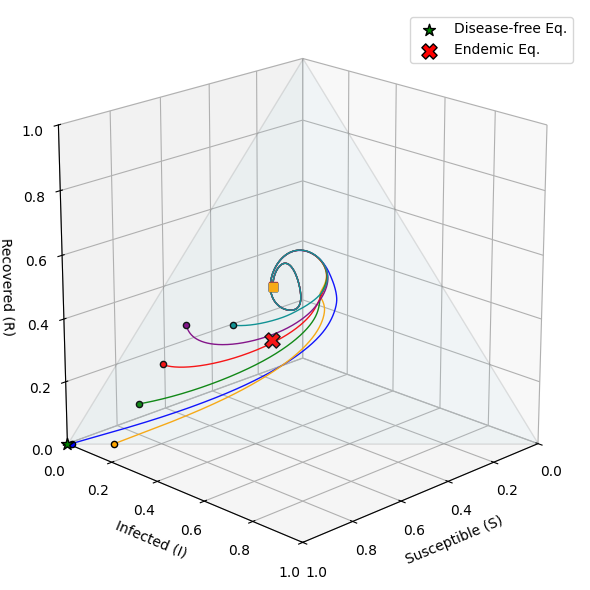

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

# Define beta, alpha, and SIR model
def beta(t, B_0, B, tau, sigma):
    return B_0 + B * np.exp(-(t - tau)**2 / (2 * sigma**2))

def alpha(t, rho_0, rho, T, iota=0):
    return rho_0 + rho * (1 + np.sin(2 * np.pi * t / T + iota))

def sir_modified(t, y, gamma, B_0, B, tau, sigma, rho_0, rho, T, iota=0):
    S, I, R = y
    betat = beta(t, B_0, B, tau, sigma)
    alphat = alpha(t, rho_0, rho, T, iota)
    dSdt = -betat * I * S + alphat * R
    dIdt = betat * I * S - gamma * I
    dRdt = gamma * I - alphat * R
    return [dSdt, dIdt, dRdt]

# Parameters
gamma, B_0, B, tau, sigma, rho_0, rho, T = 0.1, 0.3, 0.1, 50, 15, 0.05, 0.02, 100
t_fixed = 50
t_span = [0, 200]
t_eval = np.linspace(*t_span, 2000)

# Initial conditions
initial_conditions = [
    [0.99, 0.01, 0.00],
    [0.90, 0.10, 0.00],
    [0.80, 0.10, 0.10],
    [0.70, 0.10, 0.20],
    [0.60, 0.10, 0.30],
    [0.50, 0.20, 0.30],
]
colors = ['blue', 'orange', 'green', 'red', 'purple', 'darkcyan']

# Create figure
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Draw S+I+R=1 manifold (triangle)
vertices = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
triangle = Poly3DCollection([vertices], alpha=0.1, edgecolor='black')
triangle.set_facecolor('lightblue')
ax.add_collection3d(triangle)

# Solve and plot trajectories
for ic, color in zip(initial_conditions, colors):
    sol = solve_ivp(lambda t, y: sir_modified(t, y, gamma, B_0, B, tau, sigma, rho_0, rho, T),
                    t_span, ic, t_eval=t_eval)
    ax.plot(sol.y[0], sol.y[1], sol.y[2], color=color, linewidth=1)
    ax.scatter(ic[0], ic[1], ic[2], color=color, s=20, edgecolors='black')
    ax.scatter(sol.y[0][-1], sol.y[1][-1], sol.y[2][-1], color=color, s=30, marker='s')

# Add disease-free equilibrium
ax.scatter(1, 0, 0, color='green', s=80, marker='*', edgecolors='black', label="Disease-free Eq.")

# Endemic equilibrium (if exists)
betat = beta(t_fixed, B_0, B, tau, sigma)
alphat = alpha(t_fixed, rho_0, rho, T)
Rt = betat / gamma
if Rt > 1:
    def equilibrium_eq(x):
        S, I, R = x
        return [
            -betat * I * S + alphat * R,
            betat * I * S - gamma * I,
            gamma * I - alphat * R
        ]
    try:
        S_eq, I_eq, R_eq = fsolve(equilibrium_eq, [gamma/betat, 0.1, 0.1])
        if S_eq > 0 and I_eq > 0 and R_eq > 0:
            ax.scatter(S_eq, I_eq, R_eq, color='red', s=120, marker='X', edgecolors='black', label="Endemic Eq.")
    except:
        pass

# Labels and formatting
ax.set_xlabel("Susceptible (S)")
ax.set_ylabel("Infected (I)")
ax.set_zlabel("Recovered (R)")
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_box_aspect([1, 1, 1])

ax.view_init(elev=20, azim=45)  # Example: low elevation, diagonal view
ax.legend()
plt.tight_layout()
plt.show()
